In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
%load_ext autoreload
%autoreload 2
#%matplotlib inline
%matplotlib ipympl

In [178]:
def f(x, y):
    return np.sin(2*2*np.pi*x) + np.cos(3*2*np.pi*y)

In [187]:
def _2D_DFT(f_xy): # f_xy is a tensor
    N = len(f_xy)
    tmp = np.linspace(0, np.sqrt(2*np.pi), N, endpoint=False) # from 0 to sqrt(2π/N)
    Kx, Ky = np.meshgrid(tmp, tmp, indexing='ij') # (NKx, NKy), (NKx, NKy)
    F = f_xy * np.exp(-1.0j*( Kx*Kx[..., None, None] + Ky*Ky[..., None, None] )) # NKx, NKy, Nx, Ny
    # 2 Kx's are intended, save resource
    return F.sum(axis=(2,3)) /N**2

def _2D_FFT(f_xy): # f_xy is a tensor
    N = len(f_xy)
    if N == 2:
        return _2D_DFT(f_xy)
    Xe_Ye = _2D_FFT(f_xy[::2, ::2]) # NK/2
    Xo_Ye = _2D_FFT(f_xy[1::2, ::2])
    Xe_Yo = _2D_FFT(f_xy[::2, 1::2])
    Xo_Yo = _2D_FFT(f_xy[1::2, 1::2])
    
    tmp = np.linspace(0, -2.0j*np.pi, N, endpoint=False)
    Kx, Ky = np.meshgrid(tmp, tmp, indexing='ij') # (NKx, NKy), (NKx, NKy)
    return ( np.tile(Xe_Ye, (2,2)) +\
             np.exp(Kx) * np.tile(Xo_Ye, (2,2)) +\
             np.exp(Ky) * np.tile(Xe_Yo, (2,2)) +\
             np.exp(Kx+Ky) * np.tile(Xo_Yo, (2,2))  )/4

In [188]:
N = 2**8
tmp = np.linspace(0, 1, N, endpoint=False)
x, y = np.meshgrid(tmp, tmp, indexing='ij') # (NKx, NKy), (NKx, NKy)
f_xy = f(x, y)

time0 = time.time()
FFT = _2D_FFT(f_xy)
time1 = time.time()
np_FFT = np.fft.fft2(f_xy) /N**2
time2 = time.time()
np_iFFT = np.fft.ifft2(np_FFT * N**2/4)

print(f'FFT {time1 - time0}')
print(f'np_FFT {time2 - time1}')
print(f'result diff: {np.abs(FFT - np_FFT).sum()}')


FFT 0.10293865203857422
np_FFT 0.0001556873321533203
result diff: 1.2766286766590874e-14


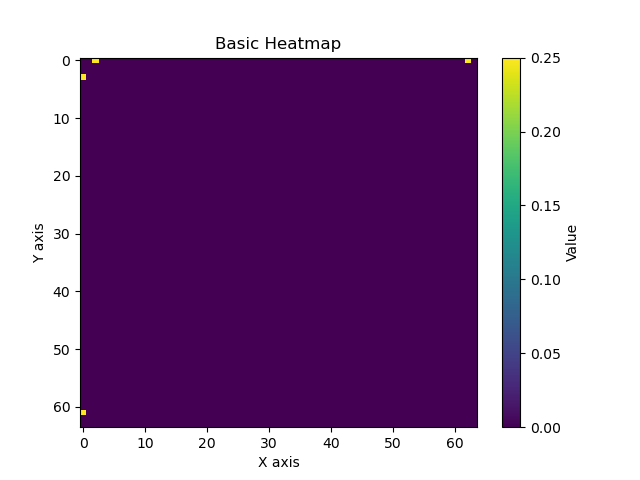

In [182]:
mag_FFT = FFT.real**2 + FFT.imag**2
mag_np_FFT = np_FFT.real**2 + np_FFT.imag**2
mag_np_iFFT = np_iFFT.real**2 + np_iFFT.imag**2

# Generate random data
data = np.random.rand(10, 12)
plt.clf()
# Plot heatmap
plt.imshow(mag_np_FFT.T, cmap='viridis', aspect='auto')
plt.colorbar(label='Value')
plt.title('Basic Heatmap')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()